#Stock Market Analysis
#####1.) What was the change in price of the stock over time?
#####2.) What was the daily return of the stock on average?
#####3.) What was the moving average of the various stocks?
#####4.) What was the correlation between different stocks' closing prices?
#####4.) What was the correlation between different stocks' daily returns?
#####5.) How much value do we put at risk by investing in a particular stock?
#####6.) How can we attempt to predict future stock behavior?

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')  #just gives a nice white grid backgroud for all presentations
%matplotlib inline

# For reading stock data from yahoo finance or google finance
from pandas.io.data import DataReader

# For time stamps - to set start and end date of data grab
from datetime import datetime

# For division - not to worry about floats - not necessary on python 3+
from __future__ import division

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
for stock in tech_list: 
    globals()[stock] = DataReader(stock,'yahoo',start,end) #Datareader takes stockticker, site, start and end
    #globals - takes the stock ticker and makes it into a global variable so you cad do this
    
AAPL  #string name is set as global variable - pretty cool APPL and MSFT are also globals!

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-08-08,94.260002,94.820000,93.279999,94.739998,41865000,93.147667
2014-08-11,95.269997,96.080002,94.839996,95.989998,36585000,94.376658
2014-08-12,96.040001,96.879997,95.610001,95.970001,33795000,94.356997
2014-08-13,96.150002,97.239998,96.040001,97.239998,31916000,95.605649
2014-08-14,97.330002,97.570000,96.800003,97.500000,28116000,95.861281
2014-08-15,97.900002,98.190002,96.860001,97.980003,48951000,96.333216
2014-08-18,98.489998,99.370003,97.980003,99.160004,47572000,97.493384
2014-08-19,99.410004,100.680000,99.320000,100.529999,69399000,98.840353
2014-08-20,100.440002,101.089996,99.949997,100.570000,52699000,98.879682


In [6]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,116.875794,117.859325,115.761548,116.789603,5.294134e+07,115.606402
std,11.335334,11.291463,11.242136,11.249189,2.139167e+07,11.597336
min,94.260002,94.820000,93.279999,94.739998,1.447960e+07,93.147667
25%,107.179998,108.537501,106.357500,107.249998,3.839578e+07,105.521929
50%,118.680001,119.794998,117.720001,118.915001,4.801830e+07,117.472692
75%,127.142502,127.907497,125.982502,126.912502,6.201008e+07,126.029532
max,134.460007,134.539993,131.399994,133.000000,1.898463e+08,131.942761


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-08-08 00:00:00 to 2015-08-07 00:00:00
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


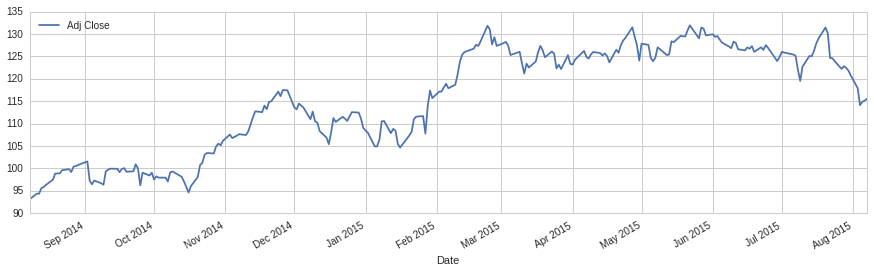

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(15,4))

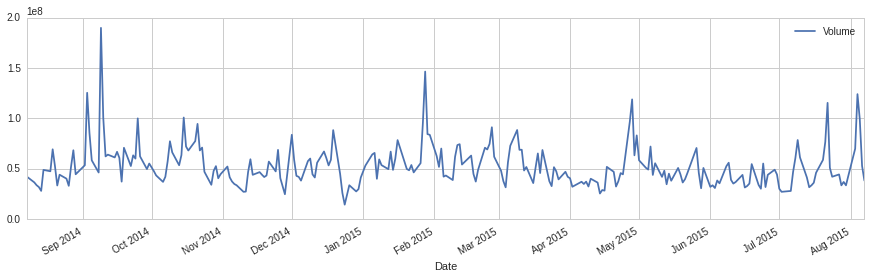

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(15,4))

In [14]:
#Moving average for the stock - research from links in ipynb in udemy - give insights into trends
ma_day = [10,20,50]

for ma in ma_day: 
    column_name = 'MA for %s days' %(str(ma)) #take string of ma not float
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)


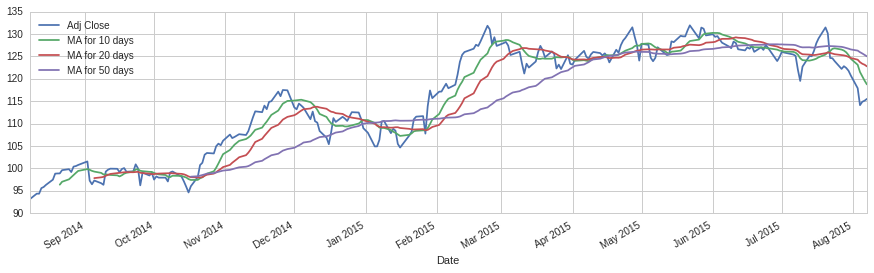

In [15]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(15,4))

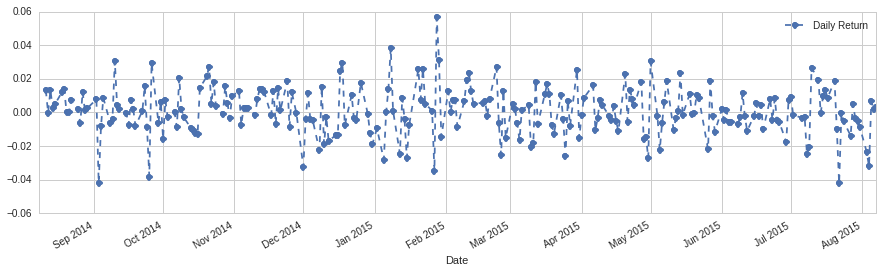

In [27]:
#Now for Daily Returns and the Risks of the stock. 
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True,figsize=(15,4),linestyle='--',marker='o')

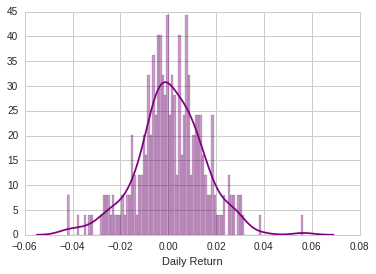

In [30]:
#Average Daily return using a histogram
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

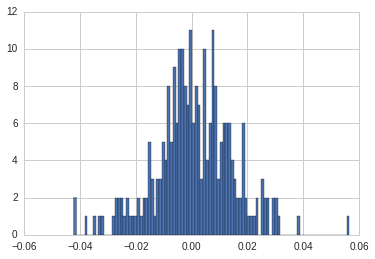

In [32]:
AAPL['Daily Return'].hist(bins=100)

In [33]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [37]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-08-08,93.569296,316.799988,568.772626,42.087777
2014-08-11,94.803850,318.329987,567.882551,42.087777
2014-08-12,94.784100,319.320007,562.732562,42.399538
2014-08-13,96.038404,326.279999,574.782639,42.945121
2014-08-14,96.295193,333.209991,574.652643,43.130228


In [39]:
tech_rets = closing_df.pct_change().dropna()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-08-11,0.013194,0.004830,-0.001565,0.000000
2014-08-12,-0.000208,0.003110,-0.009069,0.007407
2014-08-13,0.013233,0.021796,0.021414,0.012868
2014-08-14,0.002674,0.021239,-0.000226,0.004310
2014-08-15,0.004923,0.001261,-0.002036,0.011746


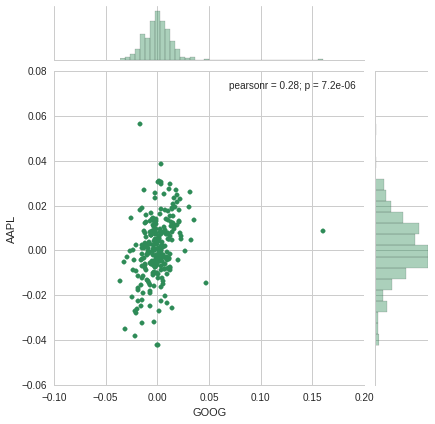

In [43]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

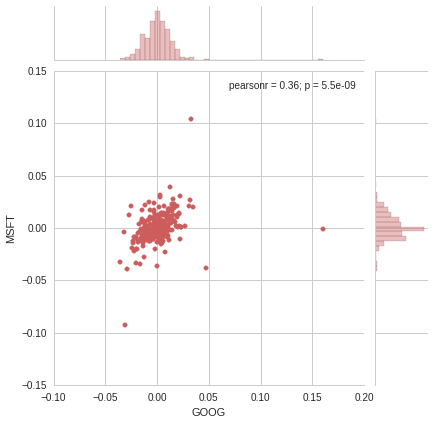

In [44]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='indianred')
#pearson R value is the product moment correlation coefficient. Gives any value of correlation
#a value of .36 is on the grid from 0 to 1 - 1 is perfectly correlated, 0 is no correlation

In [45]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-08-11,0.013194,0.004830,-0.001565,0.000000
2014-08-12,-0.000208,0.003110,-0.009069,0.007407
2014-08-13,0.013233,0.021796,0.021414,0.012868
2014-08-14,0.002674,0.021239,-0.000226,0.004310
2014-08-15,0.004923,0.001261,-0.002036,0.011746


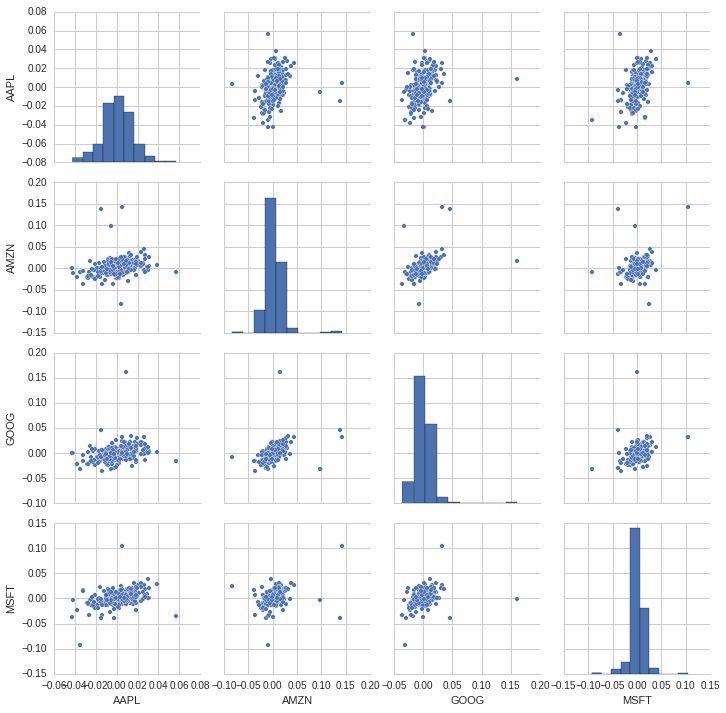

In [48]:
sns.pairplot(tech_rets)

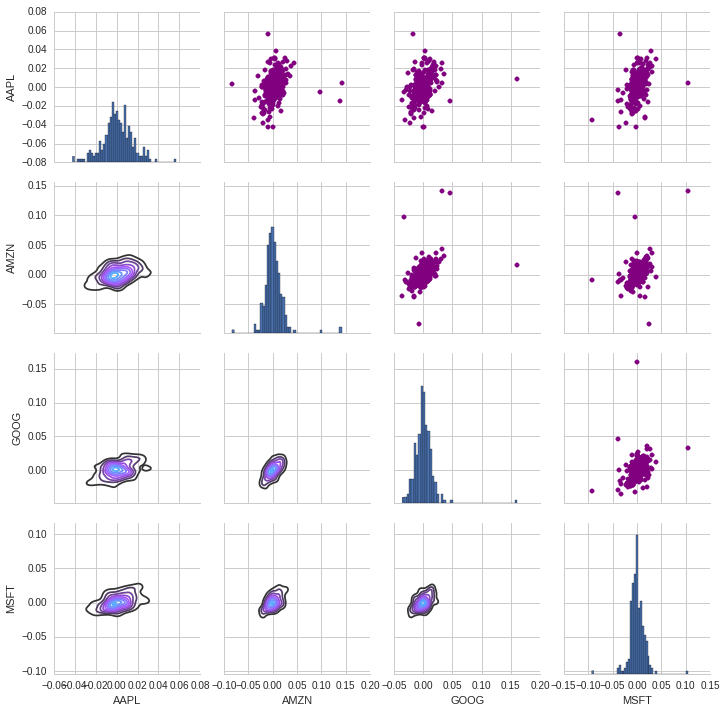

In [51]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=50)

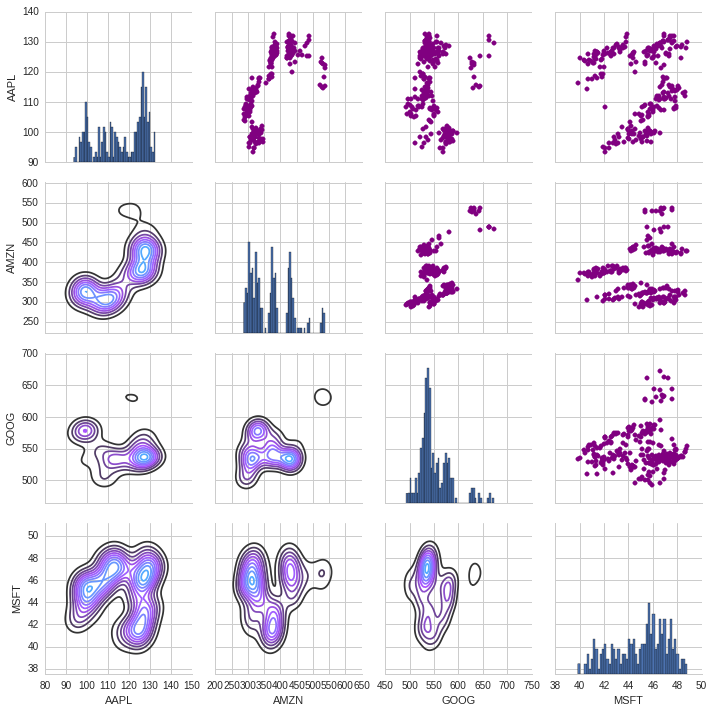

In [52]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=50)

/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


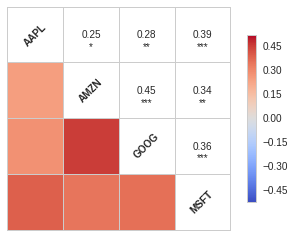

In [53]:
sns.corrplot(tech_rets.dropna(),annot=True)

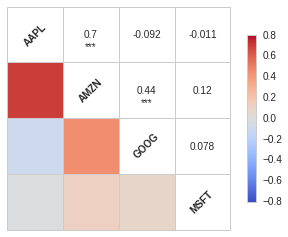

In [54]:
sns.corrplot(closing_df.dropna(),annot=True)

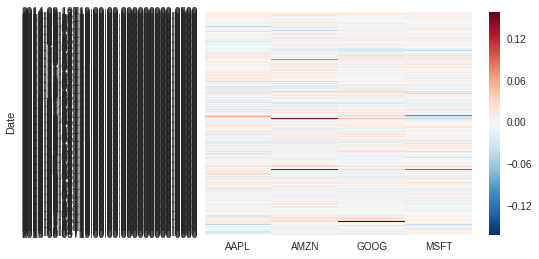

In [57]:
sns.heatmap(tech_rets.dropna())

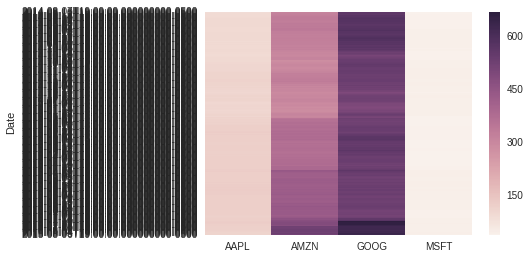

In [58]:
sns.heatmap(closing_df.dropna())

#Risk Analysis

In [59]:
rets = tech_rets.dropna()

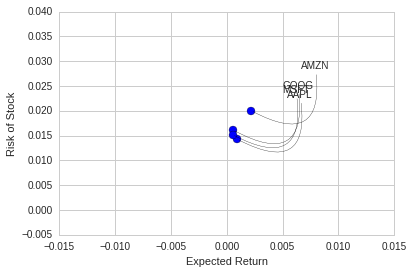

In [72]:
area = np.pi*20 #area of the circles for the scatter plot later

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk of Stock')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label, 
    xy = (x,y), xytext=(50,50),
    textcoords = 'offset points', ha='left',va='top',
    arrowprops = dict(arrowstyle='-',connectionstyle='arc3,rad=-01'))

#Value At Risk

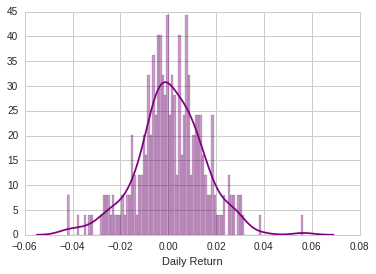

In [75]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple') 

In [78]:
#value at risk using the bootstrap method - use quantile built into pandas to get risk of stock
rets['AAPL'].quantile(0.05)
# the results is that 95% confidence your worst daily loss would not exceed -0.024... percent - 2.4%
#this is the value at risk

-0.024109295758921623

In [79]:
#value at risk using the monte carlo method - A markov process - geometric Brownian motion 
days = 365 # time horizon

dt = 1/days

#mu = rets.mean()['GOOG']
mu = rets['GOOG'].mean()

sigma = rets['GOOG'].std()


In [80]:
def stock_monte_carlo(start_price,days,mu,sigma): 
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [81]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-08-08,563.562536,570.252576,560.352500,568.772626,1494800,568.772626
2014-08-11,569.992585,570.492553,566.002578,567.882551,1214700,567.882551
2014-08-12,564.522567,565.902572,560.882579,562.732562,1542000,562.732562
2014-08-13,567.312567,575.002602,565.752564,574.782639,1441800,574.782639
2014-08-14,576.182596,577.902645,570.882599,574.652643,985500,574.652643


In [82]:
start_price = '563.56'

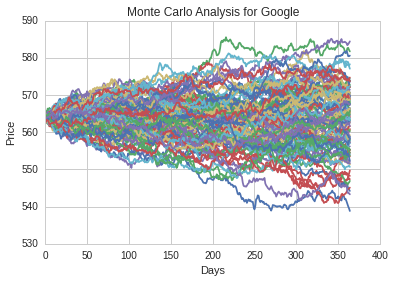

In [87]:
for run in xrange(100): 
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Monte Carlo Analysis for Google')

In [88]:
runs = 1000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

AttributeError: Unknown property figsize

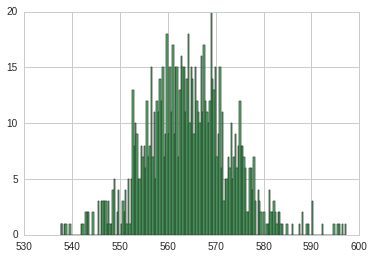

In [102]:
#define risk for this stock
q = np.percentile(simulations,1) #1% empirical quantile - 99% values should be in our output

plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot
'''
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6,0.7,'Mean final price: $%.2f' %simulations.mean())
plt.figtext(0.6,0.6,'VaR(0.99): $%.2f' %(start_price-q))
plt.figtext(0.15,0.6,'q(0.99): $%.2f' %q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title(u"Final price distribution for Google Stock after %s days" %days,weight='bold')
'''
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%s" % start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
#plt.figtext(0.6, 0.6, "VaR(0.99): $%s" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');
